In [2]:
%run featimp
# import shap
# from scipy.stats import spearmanr
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import numpy as np
# from sklearn.base import clone
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error,log_loss, r2_score,mean_absolute_error
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_predict
# import xgboost
# from tqdm import tqdm
# from scipy.stats import t,norm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [8]:
# use boston data
X, y = shap.datasets.boston()

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [9]:
X.shape

(506, 13)

In [10]:
# trying add a noise column
noise = pd.Series(np.random.normal(0,1,X.shape[0]),name='noise')
X_noise = X.join(noise)
X_noise.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,noise
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-0.785239
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-1.456767
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-0.339550
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-1.912263
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,-0.783877


In [11]:
scale_X = StandardScaler().fit_transform(X_noise)
scale_X = pd.DataFrame(scale_X,columns=list(X_noise))
scale_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,noise
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-0.735750
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-1.403543
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-0.292538
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.856507
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-0.734395


# column names

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town

* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's
* <font color = 'red'> noise</font> - artificial gaussian noise columns to serve as a beseline 

# Spearman's rank correlation coefficient

In [8]:
mg_df = X_noise.merge(pd.DataFrame(y,columns=['y']),left_index=True, right_index=True)

In [9]:
sorted_featimp = mg_df.corr(method='spearman')['y'][:-1].sort_values(ascending=False)
print(sorted_featimp)

RM         0.633576
DIS        0.445857
ZN         0.438179
B          0.185664
CHAS       0.140612
noise      0.053278
RAD       -0.346776
AGE       -0.547562
PTRATIO   -0.555905
CRIM      -0.558891
TAX       -0.562411
NOX       -0.562609
INDUS     -0.578255
LSTAT     -0.852914
Name: y, dtype: float64


In [10]:
# # modulize
# def Spearman_featimp(X,y):
#     mg_df = X.merge(pd.DataFrame(y,columns=['y']),left_index=True, right_index=True)
#     sorted_featimp = mg_df.corr(method='spearman')['y'][:-1].sort_values(ascending=False)
#     return sorted_featimp

## visualizing

In [11]:
# def visualizing(sorted_featimp):
#     sns.barplot(y = sorted_featimp.index, x= sorted_featimp.values,\
#                 palette=['#008bfb' if c >= 0 else '#ff0051' for c in sorted_featimp.values]);

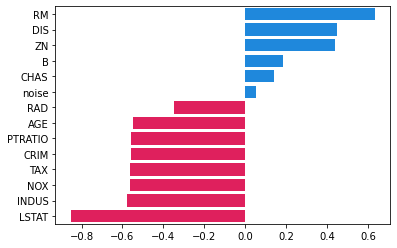

In [12]:
visualizing(Spearman_featimp(X_noise,y))

# PCA
* Note: 

>Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features.

In [13]:
# perform just on X
scale_X = StandardScaler().fit_transform(X_noise)

In [14]:
pca = PCA(n_components=None)#.fit(scale_X)
pca.fit(scale_X)
# check how much each variance each pc exlpain
ratios =pca.explained_variance_ratio_
ratios

array([0.43765443, 0.10291233, 0.0887837 , 0.07319206, 0.06022265,
       0.0585587 , 0.0469475 , 0.03820718, 0.02815036, 0.01978153,
       0.01573067, 0.01323065, 0.01209307, 0.0045352 ])

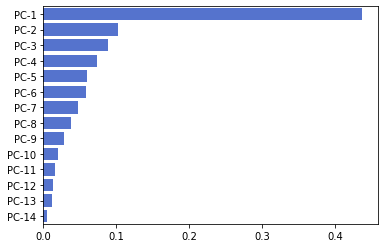

In [15]:
# 1st pc explains 47% of total ratios
sns.barplot(x = ratios,y = [f'PC-{i+1}' for i in range(len(ratios))],color='royalblue');

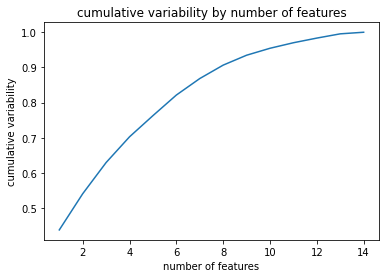

In [16]:
# cumulative variability
cumulative=[]
result=0
for i in ratios:
    result+=i
    cumulative.append(result)
    
sns.lineplot(x = np.arange(len(ratios))+1,y = cumulative)
plt.title('cumulative variability by number of features')
plt.xlabel('number of features')
plt.ylabel('cumulative variability');

In [17]:
pca_X = pca.transform(scale_X)

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

* To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
* You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the i-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [18]:
pca.components_.shape

(14, 14)

In [19]:
# transfrom to df
pcamapdf = pd.DataFrame(pca.components_, index= X_noise.columns,columns=['PC-'+str(i) for i in np.arange(pca.components_.shape[0])+1])
pcamapdf

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14
CRIM,0.250959,-0.256239,0.346659,0.005078,0.342810,-0.189295,0.313657,-0.321445,0.319800,0.338489,0.204981,-0.202995,0.309793,-0.007817
ZN,-0.309971,-0.324395,0.111049,0.440189,0.219524,0.157372,0.308341,-0.352969,-0.266874,-0.236774,-0.306225,0.235519,-0.079435,0.130892
INDUS,0.250201,0.296932,-0.017385,0.278915,0.118991,0.594382,-0.021297,-0.048372,0.290199,0.222927,-0.320137,-0.302261,-0.267735,0.038066
CHAS,-0.026318,0.083398,0.022272,0.369150,0.003160,-0.107711,0.017003,0.074149,-0.017840,-0.002203,-0.029036,0.008785,0.072520,-0.911967
NOX,0.004773,-0.114920,0.014804,0.536173,-0.186687,0.061517,-0.154158,0.093090,0.236467,0.163524,0.591958,0.352913,-0.206431,0.166647
RM,0.124200,0.310684,-0.001972,0.517158,0.022372,-0.492657,-0.117924,0.193518,-0.063650,-0.033038,-0.267122,-0.151407,0.332434,0.340724
AGE,-0.216211,-0.322389,-0.076812,0.172609,-0.153783,0.054620,-0.075162,0.024431,-0.142647,-0.193101,0.272620,-0.803546,-0.051528,0.021091
DIS,0.775399,-0.273996,-0.339935,0.069583,-0.199330,0.069949,0.123480,-0.103760,-0.139179,-0.315292,0.003461,0.072143,0.087464,-0.031631
RAD,0.157164,-0.407691,0.173837,-0.029785,0.079520,-0.321590,-0.593347,-0.120807,0.077690,0.081130,-0.319656,-0.002779,-0.428284,-0.057878
TAX,0.260231,0.358517,0.644256,-0.013597,-0.018539,0.047989,-0.067575,-0.153450,-0.470860,-0.176620,0.254681,-0.044929,-0.194799,0.001643


In [20]:
sorted_featimp = pcamapdf['PC-1'].sort_values(ascending=False)
sorted_featimp

DIS        0.775399
TAX        0.260231
CRIM       0.250959
INDUS      0.250201
RAD        0.157164
RM         0.124200
LSTAT      0.086745
noise      0.045966
PTRATIO    0.018973
NOX        0.004773
CHAS      -0.026318
B         -0.108570
AGE       -0.216211
ZN        -0.309971
Name: PC-1, dtype: float64

In [21]:
X_noise

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,noise
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-0.308575
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-1.358444
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-2.032818
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-0.114139
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.185769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.130929
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0.162063
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.555640
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,-1.530573


In [22]:
# # modulize
# def pca_featimp(X,scale_X = True):
#     columns = X.columns
#     if scale_X:
#         X = StandardScaler().fit_transform(X)
#     #print(X)
#     pca = PCA()#.fit(scale_X)
#     pca.fit(X)
#     pca_X = pca.transform(X)
#     pcamapdf = pd.DataFrame(pca.components_, index= columns,columns=['PC-'+str(i) for i in np.arange(pca.components_.shape[0])+1])
#     sorted_featimp = pcamapdf['PC-1'].sort_values(ascending=False)
#     return sorted_featimp

In [23]:
non_scale_pca = pca_featimp(X_noise,scale_X=False)

In [24]:
scale_pca = pca_featimp(X_noise)

## visualizing

         non_scaled_pca  scaled_pca
NOX            0.952338    0.004773
AGE            0.216200   -0.216211
DIS            0.124437    0.775399
CRIM           0.029297    0.250959
CHAS           0.027130   -0.026318
TAX            0.015526    0.260231
RAD            0.013843    0.157164
ZN             0.006668   -0.309971
LSTAT          0.001996    0.086745
noise          0.000513    0.045966
B             -0.001993   -0.108570
PTRATIO       -0.005924    0.018973
INDUS         -0.011479    0.250201
RM            -0.169051    0.124200


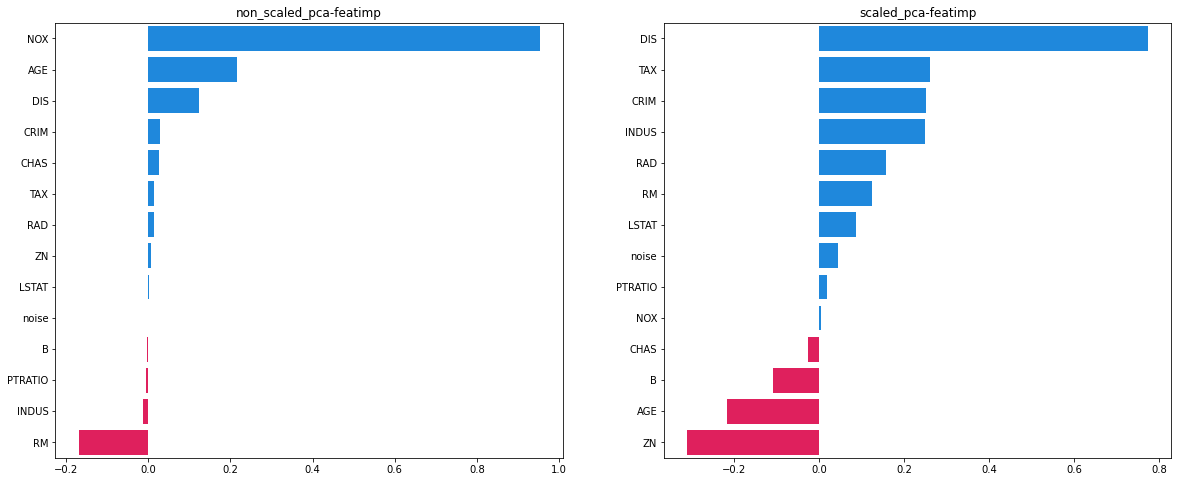

In [25]:
pca_compare = pd.concat([non_scale_pca,scale_pca],axis=1)
pca_compare.columns = ['non_scaled_pca','scaled_pca']
print(pca_compare)

plt.figure(figsize=(20,8))
plt.subplot(121)
visualizing(non_scale_pca)
plt.title('non_scaled_pca-featimp')

plt.subplot(122)
visualizing(scale_pca)
plt.title('scaled_pca-featimp');

# mRMR (Spearman's rank coefficient)
https://www.robots.ox.ac.uk/~davidc/pubs/CDT-B1-Lecture12-MondayWeek2-FeatureSelection2.pdf

In [26]:
corr_df = mg_df.corr(method='spearman')
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,noise,y
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.033413,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,-0.020700,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.018564,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,-0.021942,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.002173,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,-0.019533,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.017680,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,-0.045178,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.020960,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.050455,-0.562411


In [27]:
corr_df.iloc[0,:]['y']

-0.5588909488368801

In [28]:
(sum(corr_df.iloc[0,:-1])-1)/X.shape[1]

0.21844840825809994

In [29]:
sum(corr_df.iloc[0,:-1])

3.8398293073552994

In [30]:
corr_df.iloc[0,:]['y']-(sum(corr_df.iloc[0,:-1])-1)/X.shape[1]

-0.77733935709498

In [31]:
corr_df['y'][:-1]

CRIM      -0.558891
ZN         0.438179
INDUS     -0.578255
CHAS       0.140612
NOX       -0.562609
RM         0.633576
AGE       -0.547562
DIS        0.445857
RAD       -0.346776
TAX       -0.562411
PTRATIO   -0.555905
B          0.185664
LSTAT     -0.852914
noise      0.053278
Name: y, dtype: float64

In [32]:
(np.sum(corr_df.iloc[:-1,:-1],axis=1)-1)/X.shape[1]

CRIM       0.218448
ZN        -0.223557
INDUS      0.182213
CHAS      -0.004929
NOX        0.201254
RM        -0.148370
AGE        0.179505
DIS       -0.318321
RAD        0.188021
TAX        0.201502
PTRATIO    0.119445
B         -0.122624
LSTAT      0.150802
noise     -0.022480
dtype: float64

In [33]:
mrmr_featimp = corr_df['y'][:-1]-(np.sum(corr_df.iloc[:-1,:-1],axis=1)-1)/X.shape[1]
mrmr_featimp.sort_values(ascending=False)

RM         0.781946
DIS        0.764178
ZN         0.661735
B          0.308289
CHAS       0.145541
noise      0.075758
RAD       -0.534797
PTRATIO   -0.675349
AGE       -0.727066
INDUS     -0.760469
NOX       -0.763863
TAX       -0.763913
CRIM      -0.777339
LSTAT     -1.003716
dtype: float64

In [34]:
# # modulize
# def mRMR_featimp(X,y):
#     mg_df = X.merge(pd.DataFrame(y,columns=['y']),left_index=True, right_index=True)
#     corr_df = mg_df.corr(method='spearman')
#     # corr between each feature and y
#     I = corr_df['y'][:-1]
#     # sum of corr between each feature and other feaures 
#     # devided by total number of features
#     # -1 to correct each feature's correlation with itself is 1
#     # |S| is the length of selected features
#     b = (np.sum(corr_df.iloc[:-1,:-1],axis=1)-1)/(X.shape[1])
#     sorted_featimp = I-b
#     return sorted_featimp.sort_values(ascending=False)

In [35]:
mRMR_featimp(X_noise,y)

RM         0.771348
DIS        0.741441
ZN         0.645767
B          0.299530
CHAS       0.145189
noise      0.074152
RAD       -0.521367
PTRATIO   -0.666818
AGE       -0.714244
INDUS     -0.747453
NOX       -0.749488
TAX       -0.749520
CRIM      -0.761736
LSTAT     -0.992945
dtype: float64

## visualizing

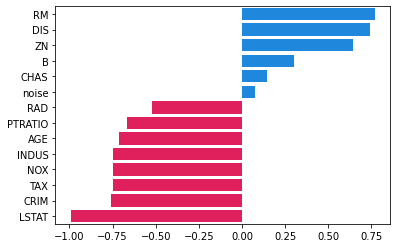

In [36]:
visualizing(mRMR_featimp(X_noise,y))

# Model-based importance strategies
## permutation importance

* Procedure: 
> 1. Compute validation metric for model trained on all features 
> 2. Permute column $x_{j}$ in validation set 
> 3. Compute validation metric set 
> 4. Importance score is the change in metric

In [37]:
# def permutation_importances(rf, X_train, y_train, metric):
#     rf.fit(X_train,y_train)
#     y_pred= rf.predict(X_train)
#     baseline = metric(y_train,y_pred)
#     imp = []
#     for col in X_train.columns:
#         save = X_train[col].copy()
#         X_train[col] = np.random.permutation(X_train[col])
        
#         y_pred= rf.predict(X_train)
#         m = metric(y_train, y_pred)
        
#         X_train[col] = save
#         imp.append(baseline - m)
#     # can't distinguish positive/negative change
#     sorted_featimp = abs(pd.Series(np.array(imp),list(X_train)))#.sort_values(ascending=False)
#     return sorted_featimp.sort_values(ascending=False)

               mse        r2
RM       47.454190  0.564209
LSTAT    46.758812  0.568929
DIS       9.281585  0.124263
CRIM      3.887043  0.042333
PTRATIO   2.641932  0.026245
NOX       2.431695  0.042368
TAX       1.734263  0.019097
AGE       1.018874  0.014180
B         0.800634  0.009103
noise     0.588696  0.006113
INDUS     0.336094  0.005180
RAD       0.216785  0.005006
ZN        0.044715  0.000339
CHAS      0.034150  0.000424


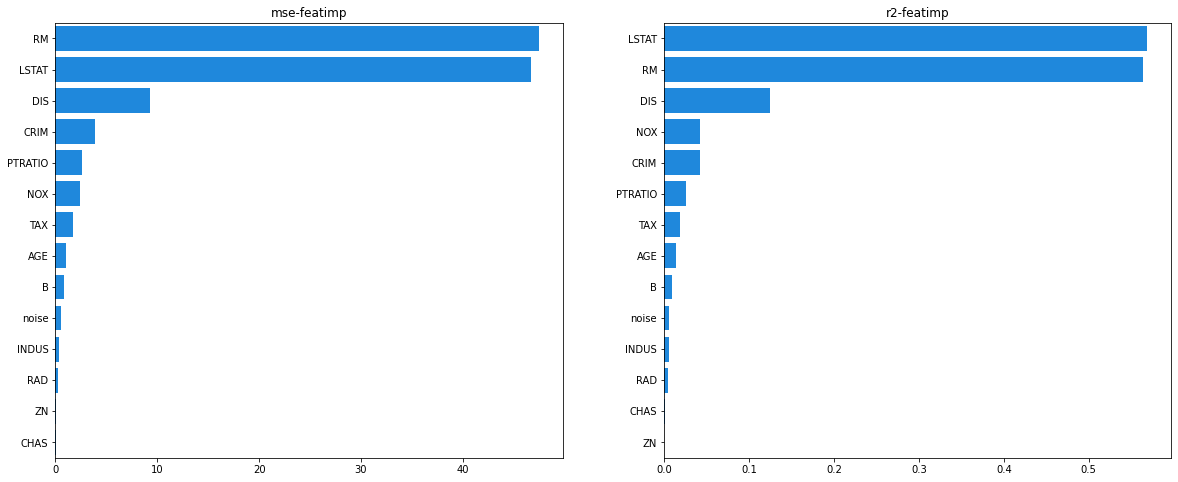

In [38]:
# use MSE as metric
rf = RandomForestRegressor(oob_score=True).fit(X_noise,y)
mse_featimp_result = permutation_importances(rf,X_noise,y,mean_squared_error)
# use R2 as metric
r2_featimp_result = permutation_importances(rf,X_noise,y,r2_score)

print(pd.concat([mse_featimp_result,r2_featimp_result],axis=1).rename(columns={0:'mse',1:'r2'}))

plt.figure(figsize=(20,8))
plt.subplot(121)
visualizing(mse_featimp_result)
plt.title('mse-featimp')

plt.subplot(122)
visualizing(r2_featimp_result)
plt.title('r2-featimp');

> any columns below `noise` we can probably drop it

# drop column importance

* Procedure: 
> 1. Compute validation metric for model trained on all features 
> 2. Drop column $x_{j}$ from training set 
> 3. Retrain model 
> 4. Compute validation metric set 
> 5. Importance score is the change in metric


In [39]:
test = X_noise.drop('noise',axis=1)


In [46]:
# def dropcol_importances(rf, X_train, y_train, random_state = False):
#     # for rf handle, need to set oob_score = True
#     # rf = RandomForestRegressor(oob_score=True)
#     rf_ = clone(rf)
#     # fix randness for debuging purpose
#     if random_state:
#         rf_.random_state = 999
#     rf_.fit(X_train, y_train)
#     # use oob_score
#     baseline = rf_.oob_score_
#     imp = []
#     for col in X_train.columns:
#         X = X_train.drop(col, axis=1)
#         rf_ = clone(rf)
#         if random_state:
#             rf_.random_state = 999
#         rf_.fit(X.values, y_train)
#         o = rf_.oob_score_
#         imp.append(baseline - o)
#     imp = np.array(imp)
#     I = pd.DataFrame(
#             data={'Feature':X_train.columns,
#                   'Importance':imp})
#     I = I.set_index('Feature')
#     I = I.sort_values('Importance', ascending=False)
#     return I['Importance']

In [41]:
rf = RandomForestRegressor(oob_score=True)

In [326]:
#dropcol_importances(rf,X,y)

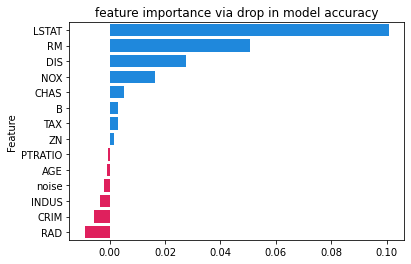

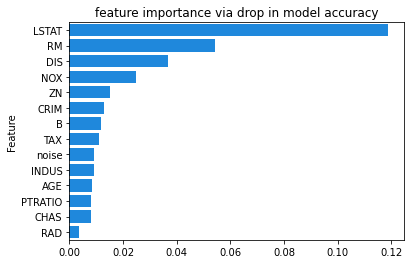

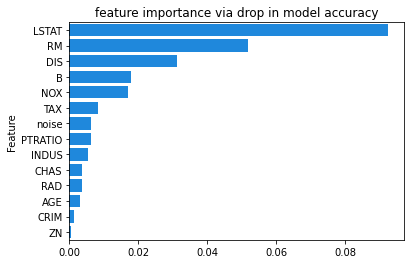

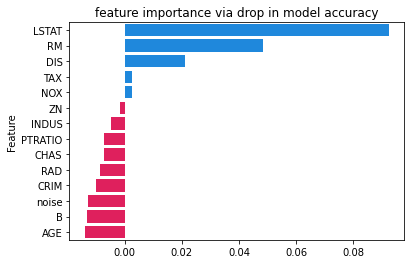

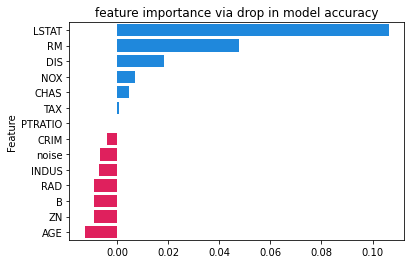

In [42]:
for _ in range(5):
    sorted_featimp = dropcol_importances(rf,X_noise,y)
    visualizing(sorted_featimp)
    plt.title('feature importance via drop in model accuracy')
    plt.show();

> sometimes noise is classified has some importance (plot 2) it could becuase of the randomness of choice best features to split in the intial rf model, if it happened to chose not importants features (including noise), noise cloud be more imformative than some of the others. Then we drop the `noise` column it will caused a big different in oob socre

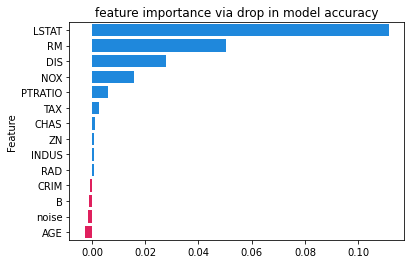

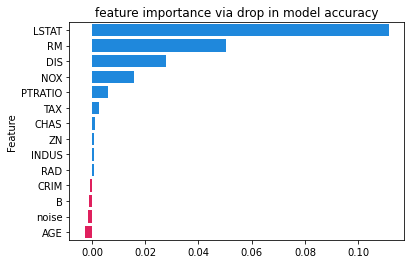

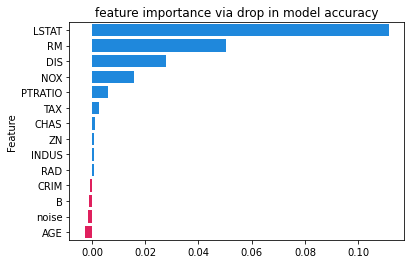

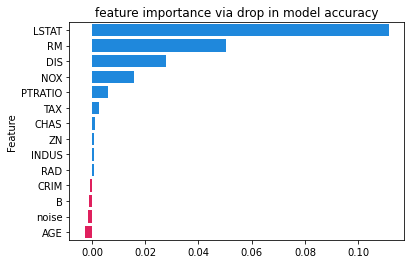

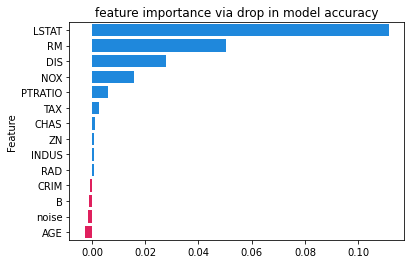

In [43]:
# fix initial rf randomness but not rf when droping each column
for _ in range(5):
    sorted_featimp = dropcol_importances(rf,X_noise,y,True)
    visualizing(sorted_featimp)
    plt.title('feature importance via drop in model accuracy')
    plt.show();

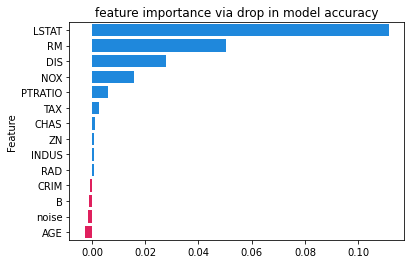

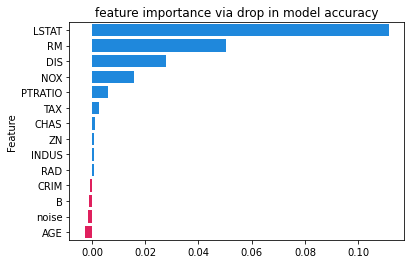

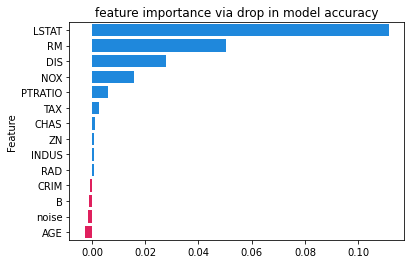

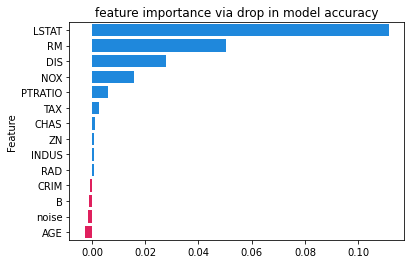

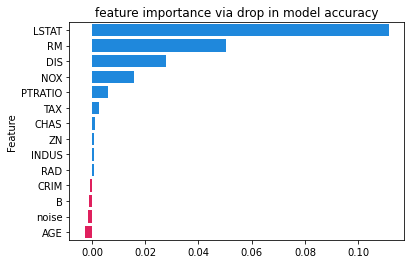

In [44]:
# not fixing initial rf randomness but fix rf when droping each column
for _ in range(5):
    sorted_featimp = dropcol_importances(rf,X_noise,y,True)
    visualizing(sorted_featimp)
    plt.title('feature importance via drop in model accuracy')
    plt.show();

> 

In [303]:
# def dropcol_importances(model,X_train, y_train,metric):
#     model.fit(X_train, y_train)
#     baseline = metric(y_valid, model.predict(X_valid))
#     imp = []
#     for col in X_train.columns:
#     X_train_ = X_train.drop(col, axis=1)
#     X_valid_ = X_valid.drop(col, axis=1)
#     model_ = clone(model)
#     model_.fit(X_train_, y_train)
#     m = metric(y_valid, model_.predict(X_valid_))
#     imp.append(baseline - m)
#     return imp

# linear coef featimp

In [47]:
# def linear_featimp(X,y):
#     linear_x = pd.DataFrame(StandardScaler().fit_transform(X),columns=list(X))
#     sorted_featimp =pd.Series(LinearRegression().fit(linear_x,y).coef_,list(X)).sort_values(ascending=False)
#     return sorted_featimp

In [1]:
visualizing(linear_featimp(X_noise,y))

NameError: name 'visualizing' is not defined

# Comparing strategies

In [49]:
spearman_result = abs(Spearman_featimp(X,y)).sort_values(ascending=False)
spearman_result

LSTAT      0.852914
RM         0.633576
INDUS      0.578255
NOX        0.562609
TAX        0.562411
CRIM       0.558891
PTRATIO    0.555905
AGE        0.547562
DIS        0.445857
ZN         0.438179
RAD        0.346776
B          0.185664
CHAS       0.140612
Name: y, dtype: float64

In [50]:
pca_result = abs(pca_featimp(X,scale_X=True)).sort_values(ascending=False)
pca_result

AGE        0.777607
ZN         0.315252
RAD        0.260390
CRIM       0.250951
INDUS      0.246566
RM         0.219660
DIS        0.153350
PTRATIO    0.109644
B          0.086761
NOX        0.082157
CHAS       0.061771
LSTAT      0.045952
TAX        0.019369
Name: PC-1, dtype: float64

In [51]:
mrmr_result = abs(mRMR_featimp(X,y)).sort_values(ascending=False)
mrmr_result

LSTAT      1.007307
RM         0.780444
CRIM       0.779910
TAX        0.767794
NOX        0.764030
INDUS      0.761897
DIS        0.760703
AGE        0.728426
PTRATIO    0.678450
ZN         0.660143
RAD        0.536410
B          0.311777
CHAS       0.143853
dtype: float64

In [52]:
linear_result = abs(linear_featimp(X,y)).sort_values(ascending=False)
linear_result

LSTAT      3.743627
DIS        3.104044
RM         2.674230
RAD        2.662218
TAX        2.076782
PTRATIO    2.060607
NOX        2.056718
ZN         1.081569
CRIM       0.928146
B          0.849268
CHAS       0.681740
INDUS      0.140900
AGE        0.019466
dtype: float64

In [53]:
rf = RandomForestRegressor(oob_score=True)
permut_result = abs(permutation_importances(rf,X,y,mean_squared_error)).sort_values(ascending=False)
permut_result

LSTAT      54.445382
RM         44.691421
DIS         8.819787
NOX         4.598605
CRIM        3.378591
PTRATIO     2.908102
TAX         1.327560
AGE         1.319216
B           0.769041
INDUS       0.450612
RAD         0.236480
CHAS        0.057860
ZN          0.037470
dtype: float64

In [54]:
permut_result.sum()

123.04012711264825

In [55]:
drop_result = abs(dropcol_importances(rf,X,y,random_state=False)).sort_values(ascending=False)
drop_result

Feature
LSTAT      0.113029
RM         0.043784
DIS        0.032918
PTRATIO    0.015368
INDUS      0.011973
NOX        0.010251
TAX        0.007686
B          0.005314
ZN         0.004745
CRIM       0.002933
AGE        0.002899
RAD        0.000651
CHAS       0.000622
Name: Importance, dtype: float64

In [112]:
results = [spearman_result,pca_result,mrmr_result,linear_result,permut_result,drop_result]
maes = [[] for _ in range(X.shape[1])]
for i in range(X.shape[1]):
    for r in results:
        # standard scale for liner ols
        linear_x = StandardScaler().fit_transform(X[r[:i+1].index])
        reg = LinearRegression()
        y_pred = cross_val_predict(reg, linear_x, y, cv=5)
        mae_score =mean_absolute_error(y,y_pred)
        # append each method's mae with the same amount of features
        maes[i].append(mae_score)

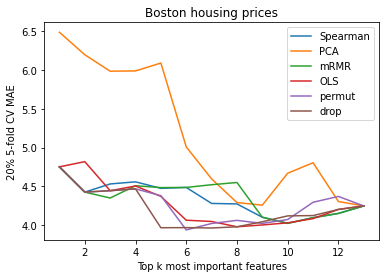

In [148]:
df = pd.DataFrame(maes,columns=['Spearman','PCA','mRMR','OLS','permut','drop'],index= range(1,14))
for i in df:
    sns.lineplot(x = df.index,y = df[i],label=i)
    plt.legend(loc = 0)
    plt.ylabel('20% 5-fold CV MAE')
    plt.xlabel('Top k most important features')
    plt.title('Boston housing prices');

In [56]:
# # modulize
# def compare_strategies(model, X,y, scale_X = True, metric = mean_squared_error, random_state=False):
#     '''
#     INPUT mode : {'OSL','RF','XGBoost'}
#     '''
#     # collect 6 different strategies results
#     spearman_result = abs(Spearman_featimp(X,y)).sort_values(ascending=False)
#     pca_result = abs(pca_featimp(X,scale_X=scale_X)).sort_values(ascending=False)
#     mrmr_result = abs(mRMR_featimp(X,y)).sort_values(ascending=False)
#     linear_result = abs(linear_featimp(X,y)).sort_values(ascending=False)
#     rf = RandomForestRegressor(oob_score=True)
#     permut_result = abs(permutation_importances(rf,X,y,metric)).sort_values(ascending=False)
#     drop_result = abs(dropcol_importances(rf,X,y,random_state=random_state)).sort_values(ascending=False)
    
#     results = [spearman_result,pca_result,mrmr_result,linear_result,permut_result,drop_result]
#     maes = [[] for _ in range(X.shape[1])]
#     for i in range(X.shape[1]):
#         for r in results:
#             # standard scale for liner ols
#             scale_x = StandardScaler().fit_transform(X[r[:i+1].index])
#             if model == 'OSL':
#                 handle = LinearRegression()
#             elif model == 'RF':
#                 handle = RandomForestRegressor()
#             elif model == 'XGBoost':
#                 handle = xgboost.XGBRegressor()
#             y_pred = cross_val_predict(handle, scale_x, y, cv=5)
#             mae_score =mean_absolute_error(y,y_pred)
#             # append each method's mae with the same amount of features
#             maes[i].append(mae_score)
            
#     df = pd.DataFrame(maes,columns=['Spearman','PCA','mRMR','OLS','permut','drop'],index= range(1,14))

#     # plotting
#     plt.figure(figsize=(20,8))
#     for i in df:
#         sns.lineplot(x = df.index,y = df[i],label=i)
#         plt.legend(loc = 0)
#         plt.ylabel('20% 5-fold CV MAE')
#         plt.xlabel('Top k most important features')
#         plt.title(f'Boston housing prices with {model}');
#     return df

,Spearman,PCA,mRMR,OLS,permut,drop
1,4.751086,6.488850,4.751086,4.751086,4.751086,4.751086
2,4.425238,6.198557,4.425238,4.818522,4.425238,4.425238
3,4.530618,5.986232,4.349199,4.443385,4.443385,4.443385
4,4.557821,5.989424,4.507520,4.504520,4.341376,4.467431
5,4.473719,6.091422,4.483658,4.370202,4.379167,4.580077
6,4.485628,5.008933,4.485628,4.062579,3.937247,4.414030
7,4.279084,4.595931,4.520631,4.046031,4.020101,4.458268
8,4.272707,4.290091,4.549364,3.977678,4.060458,4.383322
9,4.100739,4.257436,4.100739,4.001176,4.021194,4.506916
10,4.022477,4.668922,4.022477,4.028554,4.071076,4.561217


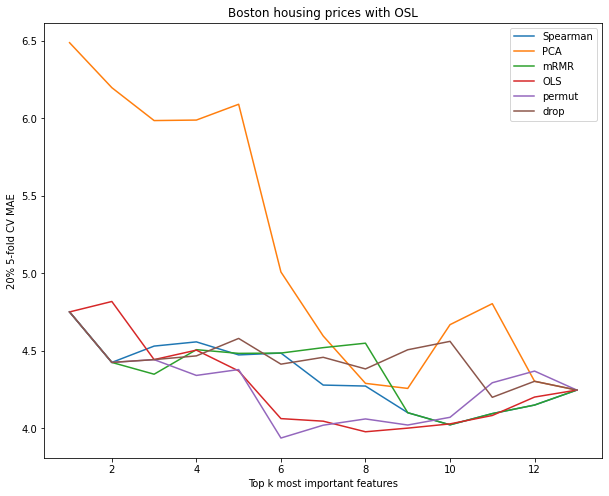

In [57]:
compare_strategies('OSL',X,y)

,Spearman,PCA,mRMR,OLS,permut,drop
1,5.133036,7.831267,5.115156,5.129697,5.090434,5.099299
2,3.694370,7.409460,3.680344,4.451957,3.636466,3.706225
3,3.425955,6.576404,3.174759,3.624148,3.688549,3.659121
4,3.177105,6.635617,3.222583,3.518279,3.407447,3.314958
5,3.207385,6.067816,3.134018,3.447785,3.140247,3.162441
6,3.127765,4.075085,3.218943,3.253012,2.965016,3.230666
7,3.097852,3.906524,3.143208,3.224664,2.983126,3.013460
8,3.025589,3.737634,3.066676,3.177217,2.946955,3.023488
9,3.017506,3.737883,2.971166,3.025366,2.919907,3.009097
10,2.943577,3.487747,2.983528,2.965049,3.024375,3.036925


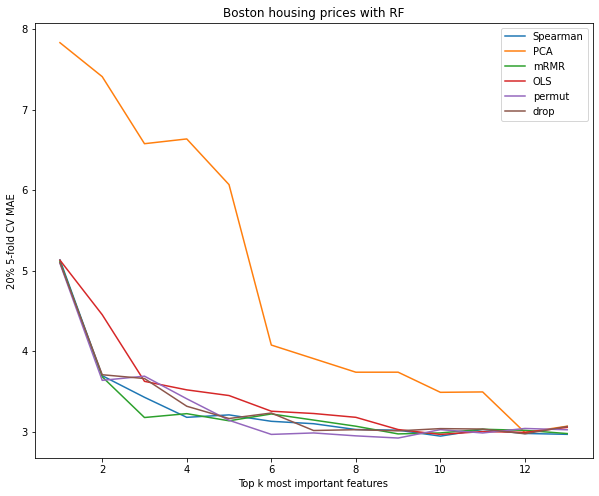

In [58]:
compare_strategies('RF',X,y)

,Spearman,PCA,mRMR,OLS,permut,drop
1,5.217973,8.239049,5.217973,5.217973,5.217973,5.217973
2,4.059360,7.758078,4.059360,4.808437,4.059360,4.059360
3,3.483601,7.451647,3.418966,3.895204,3.886842,3.886842
4,3.340370,7.247437,3.455767,3.792380,3.600667,3.600667
5,3.480245,6.591664,3.305378,3.683578,3.439324,3.618430
6,3.256865,4.210773,3.302332,3.462845,3.278610,3.570561
7,3.288080,3.911084,3.521886,3.338465,3.124396,3.613631
8,3.191420,3.710270,3.230563,3.359128,3.026749,3.364113
9,3.084917,3.634601,3.125119,3.140559,2.927970,3.345937
10,3.065318,3.311987,3.124266,3.049565,2.917594,3.117078


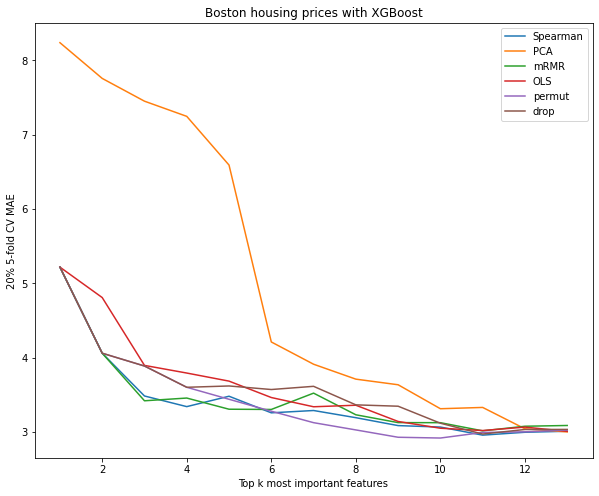

In [59]:
compare_strategies('XGBoost',X,y)

## shap boston featimp

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


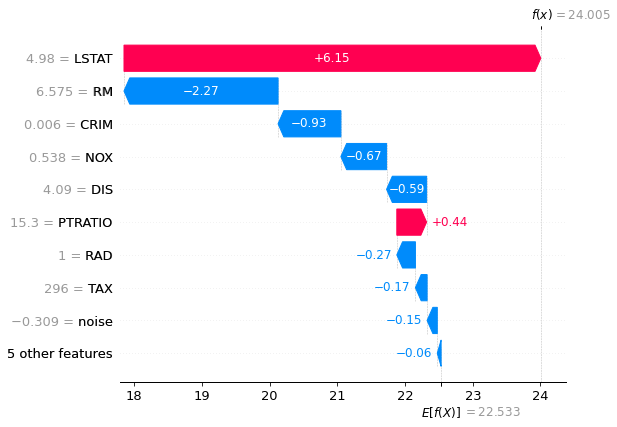

In [60]:
model = xgboost.XGBRegressor().fit(X_noise, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_noise)

# # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Automatic feature selection algorithm
## regression baseline (mse)
* Note: we add a guassian noise column in X and use permutation method to decide importance. Any feature rated below noise we can drop it.

In [61]:
noise = pd.Series(np.random.normal(0,1,X.shape[0]),name='noise')
X_noise = X.join(noise)
X_noise.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,noise
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.260008
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-1.154257
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.100386
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-0.469535
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.063651


In [62]:
rf = RandomForestRegressor(oob_score=True)
rf_ = clone(rf)
rf_.fit(X_noise,y)
y_pred = rf_.predict(X_noise)
baseline_mse = mean_squared_error(y,y_pred)
baseline_mse

1.4596072351778648

In [63]:
# get permut featimp
featimp = permutation_importances(rf,X_noise,y,mean_absolute_error)
featimp

LSTAT      3.661431
RM         3.418431
DIS        0.731636
CRIM       0.694043
NOX        0.640200
PTRATIO    0.439589
AGE        0.380909
TAX        0.329227
B          0.217810
noise      0.124279
INDUS      0.116409
RAD        0.066429
ZN         0.018018
CHAS       0.013690
dtype: float64

In [64]:
imp_features = list(featimp[:list(featimp.index).index('noise')].index)
imp_features

['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE', 'TAX', 'B']

In [65]:
# drop all features below noise and noise
X_new = X_noise.loc[:,imp_features]
X_new

,LSTAT,RM,DIS,CRIM,NOX,PTRATIO,AGE,TAX,B
0,4.98,6.575,4.0900,0.00632,0.538,15.3,65.2,296.0,396.90
1,9.14,6.421,4.9671,0.02731,0.469,17.8,78.9,242.0,396.90
2,4.03,7.185,4.9671,0.02729,0.469,17.8,61.1,242.0,392.83
3,2.94,6.998,6.0622,0.03237,0.458,18.7,45.8,222.0,394.63
4,5.33,7.147,6.0622,0.06905,0.458,18.7,54.2,222.0,396.90
...,...,...,...,...,...,...,...,...,...
501,9.67,6.593,2.4786,0.06263,0.573,21.0,69.1,273.0,391.99
502,9.08,6.120,2.2875,0.04527,0.573,21.0,76.7,273.0,396.90
503,5.64,6.976,2.1675,0.06076,0.573,21.0,91.0,273.0,396.90
504,6.48,6.794,2.3889,0.10959,0.573,21.0,89.3,273.0,393.45


In [66]:
# recompute mse
rf_new = RandomForestRegressor(oob_score=True)
rf_new.fit(X_new,y)
y_pred_new = rf_new.predict(X_new)
new_mse = mean_squared_error(y,y_pred_new)
new_mse

1.4620045513833988

In [76]:
for i in range(1,len(imp_features)):
    print(imp_features[:-i])

['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE', 'TAX']
['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE']
['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'PTRATIO']
['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX']
['LSTAT', 'RM', 'DIS', 'CRIM']
['LSTAT', 'RM', 'DIS']
['LSTAT', 'RM']
['LSTAT']


In [73]:
# # modulize
# def auto_feat_select(X,y,metric):
#     plotx = []
#     ploty =[]
#     # add noise column
#     noise = pd.Series(np.random.normal(0,1,X.shape[0]),name='noise')
#     X_noise = X.join(noise)
#     plotx.append(X_noise.shape[1])
#     # baseline mse
#     rf = RandomForestRegressor(oob_score=True)
#     rf_ = clone(rf)    
#     rf_.fit(X_noise,y)
#     y_pred = rf_.predict(X_noise)
#     baseline = metric(y,y_pred)
#     ploty.append(baseline)
#     # get permut featimp
#     featimp = permutation_importances(rf,X_noise,y,metric)
#     # get feature names that above the noise column
#     imp_features = list(featimp[:list(featimp.index).index('noise')].index)
#     # drop all features below noise and noise
#     X_reduce = X_noise.loc[:,imp_features]
#     plotx.append(X_reduce.shape[1])
#     # recompute mse
#     rf_new = RandomForestRegressor(oob_score=True)
#     rf_new.fit(X_reduce,y)
#     y_pred_new = rf_new.predict(X_reduce)
#     baseline = metric(y,y_pred_new)
#     ploty.append(baseline)
#     # drop one feature at a time from the least imp one
    
#     # print(f'after drop noise and below: {imp_features}')
#     # print(f'init baseline : {baseline}')
    
#     for i in range(1,len(imp_features)):
#         # print(f'features: {imp_features}')
#         X_reduce = X_reduce.loc[:,imp_features[:-1]]
#         plotx.append(X_reduce.shape[1])
#         # print(f'try: {list(X_reduce)}')
#         # recompute mse
#         rf_new = RandomForestRegressor(oob_score=True)
#         rf_new.fit(X_reduce,y)
#         y_pred_new = rf_new.predict(X_reduce)
#         new_metirc = metric(y,y_pred_new)
#         ploty.append(new_metirc)
#         # print(f'baseline: {baseline}, new_metirc: {new_metirc}')
        
#         if new_metirc>baseline:
#             return imp_features, plotx,ploty
#         imp_features = list(X_reduce)
#         baseline = new_metirc.copy()

In [78]:
features, xs,ys = auto_feat_select(X,y,mean_squared_error)
features, xs,ys 

(['LSTAT', 'RM', 'DIS', 'NOX', 'CRIM', 'PTRATIO', 'TAX'],
 [14, 9, 8, 7, 6],
 [1.3542374328063225,
  1.6088243280632402,
  1.5466525098814208,
  1.49812232806324,
  1.5955569920948613])

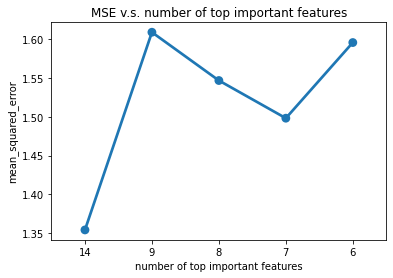

In [79]:
sns.pointplot(x = [str(i) for i in xs],y = ys)
plt.xlabel('number of top important features')
plt.ylabel('mean_squared_error')
plt.title('MSE v.s. number of top important features');

> Note: the second point spiked because we drop all the feature has lower importance than a noise column, this lead to a little bit deteriorate in terms of our mertic but made sure there was not feature kept due to randomness.

# Variance and empirical p-values for feature importances

In [80]:
# def empirical_imp(X,y,metric=mean_squared_error, n_run = 80,shuffle_y = False):
#     '''
#     shuffle_y = False - Returns actual permuted Feature important with 95% CI
#     shuffle_y = True - Returns Feature importance under Ho: feature is not significant in predicting y
#     '''
#     imp_df = pd.DataFrame()
#     for i in tqdm(range(n_run)):
#         rf = RandomForestRegressor(oob_score=True)
#         if shuffle_y:
#             permute_imp = permutation_importances(rf,X,np.random.permutation(y),metric)

#             #y = np.random.permutation(y)
#         else:
#             permute_imp = permutation_importances(rf,X,y,metric)
#         # normalize
#         normalized_imp = permute_imp/permute_imp.sum()
#         # form to 1*k df
#         norm_df = pd.DataFrame(normalized_imp).T
#         # Concat the latest importances with the old ones
#         imp_df = pd.concat([imp_df, norm_df], axis=0)
#     imp_df.reset_index(drop=True,inplace=True)
#     return imp_df

## Feature important with 95% CI

In [81]:
df = empirical_imp(X_noise,y)
df

100%|███████████████████████████████████████████| 80/80 [00:29<00:00,  2.72it/s]


,LSTAT,RM,DIS,NOX,CRIM,PTRATIO,TAX,AGE,B,noise,INDUS,RAD,ZN,CHAS
0,0.428857,0.358549,0.089613,0.036724,0.027180,0.019788,0.012437,0.011437,0.006794,0.003158,0.002908,0.001846,0.000412,0.000296
1,0.419311,0.386407,0.071683,0.032531,0.029816,0.018105,0.012335,0.011954,0.007133,0.003035,0.004084,0.002601,0.000534,0.000473
2,0.427077,0.371645,0.079563,0.032404,0.026836,0.021607,0.012370,0.010824,0.008056,0.003317,0.004225,0.001332,0.000470,0.000274
3,0.440037,0.352042,0.089362,0.028836,0.029327,0.020810,0.012881,0.010814,0.007211,0.002854,0.003063,0.002111,0.000412,0.000241
4,0.376526,0.421125,0.075957,0.038167,0.027562,0.020800,0.012618,0.011302,0.006560,0.002826,0.003420,0.002272,0.000424,0.000442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.404130,0.388213,0.089847,0.033512,0.032506,0.015954,0.010510,0.008604,0.007307,0.003361,0.003472,0.001798,0.000438,0.000348
76,0.420509,0.392870,0.072342,0.025497,0.028232,0.023516,0.012792,0.008123,0.006690,0.003181,0.003304,0.002104,0.000409,0.000432
77,0.434285,0.360460,0.093369,0.034347,0.023189,0.013880,0.014470,0.010480,0.005959,0.002364,0.004083,0.002356,0.000468,0.000289
78,0.446549,0.353337,0.073654,0.033739,0.034178,0.020298,0.012694,0.010842,0.006295,0.002406,0.003503,0.001657,0.000501,0.000346


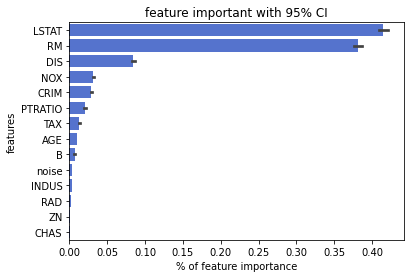

In [82]:
sns.barplot(data=df,orient='h',color='royalblue')
plt.xlabel('% of feature importance')
plt.ylabel('features')
plt.title('feature important with 95% CI');

## hypothesis test
* actual imp using above bootstraped(80 times) avg featimp
$$H_{0}: feature\space importance\space calculated = feature\space importance\space when\space doesn't\space contribut\space to\space y$$
> Explain:

For each feature, if porprotion of feature importances under $H_{0}$ distribution that are smaller than actual calcluated premuted feature importances is greater than 5%, then this feature importance we calcluted is not statistically significant (å = 5%)

In [83]:
df.mean(axis=0)

LSTAT      0.414832
RM         0.380993
DIS        0.084124
NOX        0.031577
CRIM       0.028940
PTRATIO    0.020531
TAX        0.013000
AGE        0.010047
B          0.006746
noise      0.003111
INDUS      0.003297
RAD        0.002059
ZN         0.000377
CHAS       0.000367
dtype: float64

In [84]:
null_df = empirical_imp(X_noise,y, shuffle_y=True,n_run=100)
null_df

100%|█████████████████████████████████████████| 100/100 [00:41<00:00,  2.42it/s]


,noise,RM,LSTAT,AGE,CRIM,B,DIS,INDUS,PTRATIO,NOX,TAX,RAD,ZN,CHAS
0,0.172779,0.131603,0.118202,0.088130,0.084263,0.079789,0.066028,0.064807,0.064770,0.055281,0.039549,0.017211,0.013491,0.004098
1,0.130306,0.083260,0.149528,0.127464,0.093781,0.070491,0.074678,0.046791,0.031210,0.022724,0.139160,0.021250,0.005758,0.003599
2,0.156614,0.157844,0.158605,0.119370,0.080657,0.070276,0.080677,0.029628,0.035207,0.037330,0.029324,0.019992,0.008580,0.015895
3,0.098012,0.110711,0.163395,0.085726,0.096668,0.097327,0.150602,0.036437,0.029820,0.059631,0.046584,0.009884,0.013318,0.001884
4,0.168204,0.089718,0.134822,0.143165,0.083731,0.068953,0.118035,0.025952,0.053788,0.041290,0.035958,0.016527,0.014237,0.005620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.116813,0.177826,0.115402,0.074446,0.103093,0.105013,0.092260,0.050475,0.031744,0.050424,0.047967,0.022955,0.007804,0.003779
96,0.168311,0.086004,0.094140,0.123086,0.097738,0.111404,0.079203,0.024126,0.035268,0.060844,0.097512,0.017397,0.003161,0.001807
97,0.117418,0.117974,0.100566,0.124255,0.105951,0.136812,0.088397,0.039411,0.047891,0.051023,0.034865,0.023649,0.006290,0.005498
98,0.107022,0.132541,0.068975,0.135979,0.113411,0.091212,0.103193,0.031701,0.047095,0.075529,0.055112,0.021061,0.008790,0.008379


In [85]:
trans_df = np.log(null_df)
mean = trans_df['CRIM'].mean()
std = trans_df['CRIM'].std()
lower_threshold= norm.ppf(0.05,loc = mean,scale = std)#,df = len(null_df)-1)
upper_threshold = norm.ppf(0.95,loc = mean,scale = std)

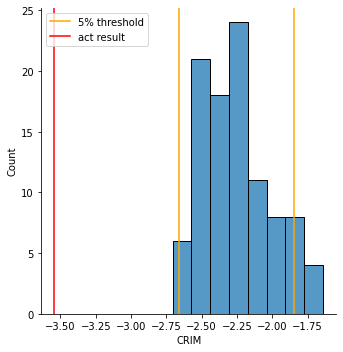

In [86]:
sns.displot(trans_df['CRIM'])
plt.axvline(x = lower_threshold,color='orange',label ='5% threshold')
plt.axvline(x = upper_threshold,color='orange')
plt.axvline(x = np.log(df.mean(axis=0)['CRIM']),color='red',label ='act result')
plt.legend(loc = 0);

In [87]:
np.log(null_df)

,noise,RM,LSTAT,AGE,CRIM,B,DIS,INDUS,PTRATIO,NOX,TAX,RAD,ZN,CHAS
0,-1.755741,-2.027969,-2.135358,-2.428946,-2.473813,-2.528375,-2.717678,-2.736339,-2.736911,-2.895332,-3.230225,-4.062204,-4.305736,-5.497183
1,-2.037870,-2.485790,-1.900269,-2.059922,-2.366788,-2.652270,-2.594566,-3.062068,-3.467008,-3.784355,-1.972128,-3.851422,-5.157210,-5.627105
2,-1.853970,-1.846147,-1.841339,-2.125526,-2.517550,-2.655322,-2.517308,-3.519036,-3.346500,-3.287949,-3.529357,-3.912416,-4.758346,-4.141722
3,-2.322664,-2.200831,-1.811583,-2.456601,-2.336473,-2.329676,-1.893116,-3.312175,-3.512592,-2.819586,-3.066489,-4.616807,-4.318618,-6.274103
4,-1.782580,-2.411086,-2.003798,-1.943755,-2.480140,-2.674332,-2.136775,-3.651498,-2.922704,-3.187128,-3.325413,-4.102787,-4.251886,-5.181487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-2.147178,-1.726950,-2.159337,-2.597687,-2.272121,-2.253669,-2.383142,-2.986285,-3.450059,-2.987293,-3.037235,-3.774233,-4.853164,-5.578348
96,-1.781942,-2.453359,-2.362967,-2.094873,-2.325463,-2.194588,-2.535746,-3.724466,-3.344791,-2.799448,-2.327782,-4.051471,-5.756962,-6.316174
97,-2.142017,-2.137288,-2.296944,-2.085421,-2.244777,-1.989145,-2.425912,-3.233723,-3.038836,-2.975485,-3.356260,-3.744431,-5.068752,-5.203422
98,-2.234719,-2.020864,-2.674008,-1.995258,-2.176734,-2.394563,-2.271156,-3.451395,-3.055597,-2.583240,-2.898389,-3.860325,-4.734196,-4.782017


In [88]:
# def distimp_plot(df, feature, actual_normalized_imp_df, log_trans = True):
#     # some of the distributions are skewed, so in defult we apply log_trans
#     if log_trans:
#         #print('log transforming')
#         df = np.log(df)
#         act_vline = np.log(actual_normalized_imp_df[feature])
#     else:
#         act_vline = actual_normalized_imp_df[feature]

#     sns.displot(df[feature])
#     plt.axvline(x = act_vline,color='red',label ='act result')
#     # 95% thresholds
#     mean = df[feature].mean()
#     std = df[feature].std()
#     lower_threshold= norm.ppf(0.05,loc = mean,scale = std)
#     upper_threshold = norm.ppf(0.95,loc = mean,scale = std)
#     plt.axvline(x = lower_threshold,color='orange',label ='5% threshold')
#     plt.axvline(x = upper_threshold,color='orange')
#     plt.legend(loc =0)
#     plt.title(f'{feature} important under Ho')
    

In [89]:
# def plot_all_features(null_df,actual_normalized_imp_df,log_trans = True):
#     for feature in list(null_df):
#         distimp_plot(null_df,feature,actual_normalized_imp_df.mean(axis=0),log_trans =log_trans )

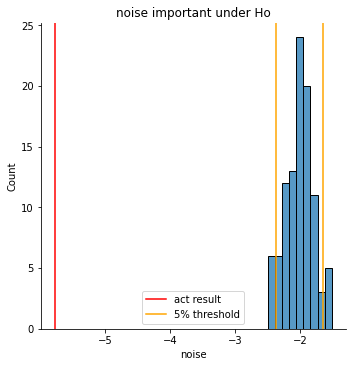

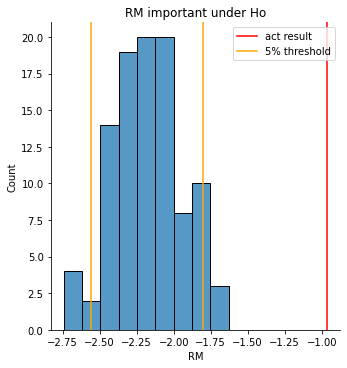

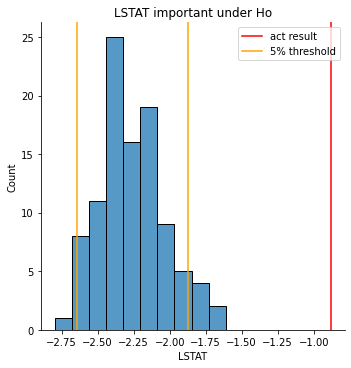

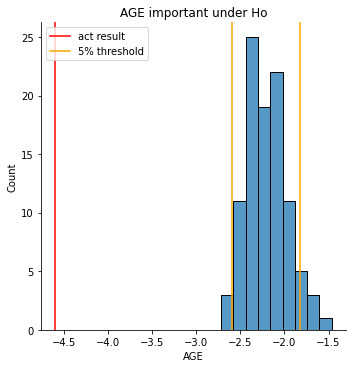

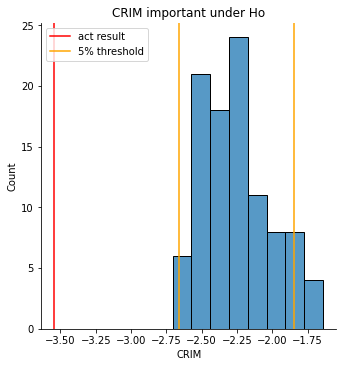

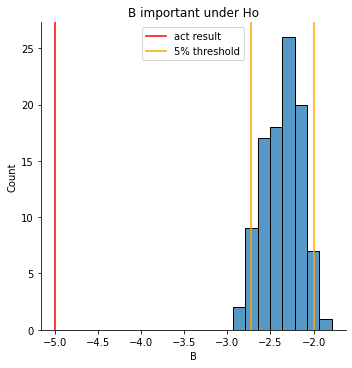

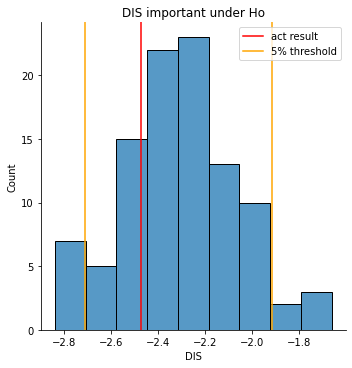

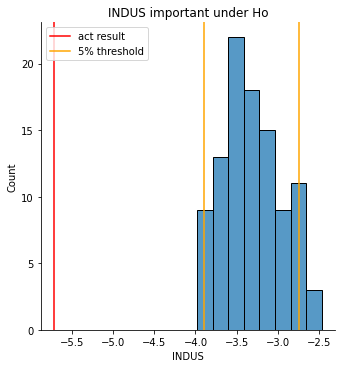

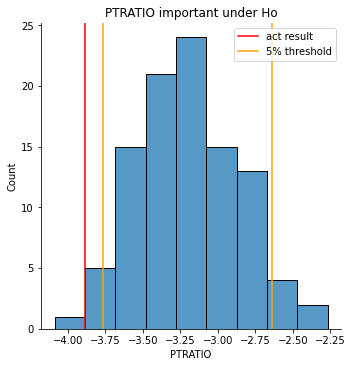

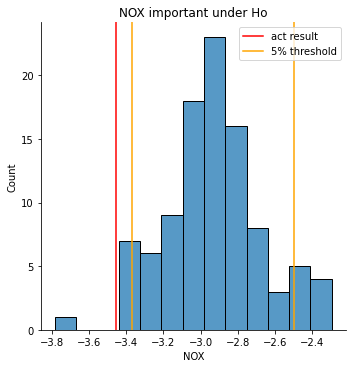

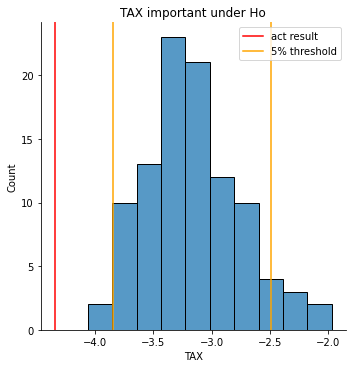

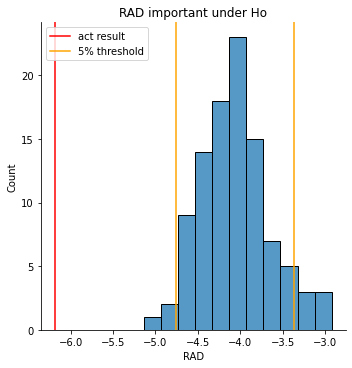

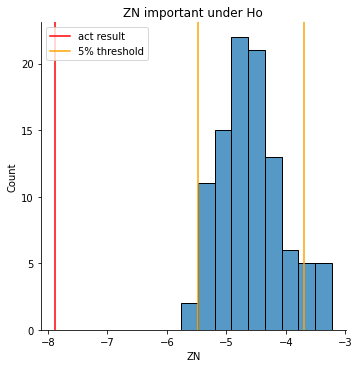

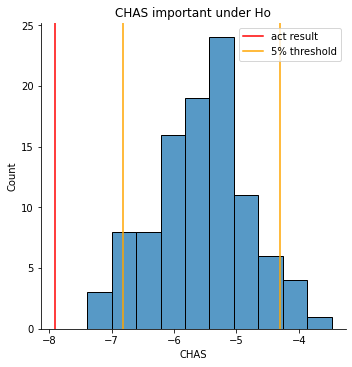

In [90]:
# apply log trans, only CRIM is not significant
plot_all_features(null_df,df)

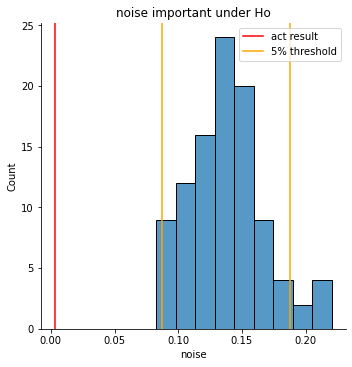

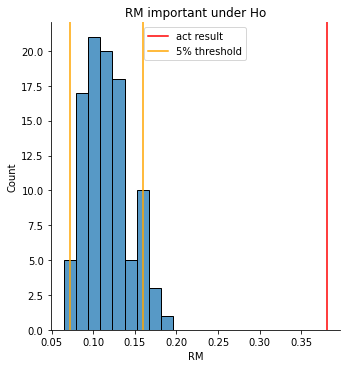

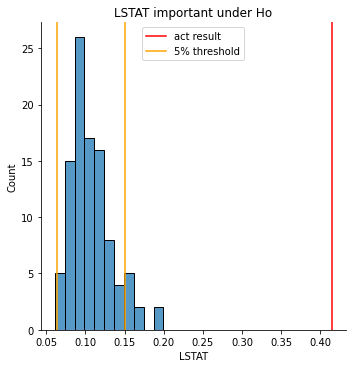

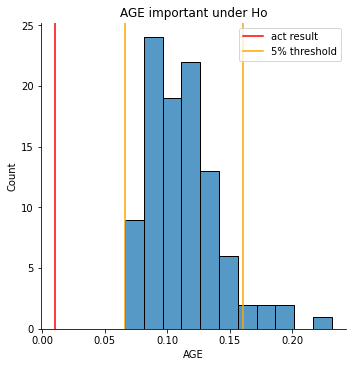

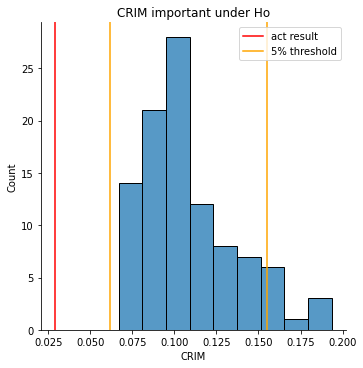

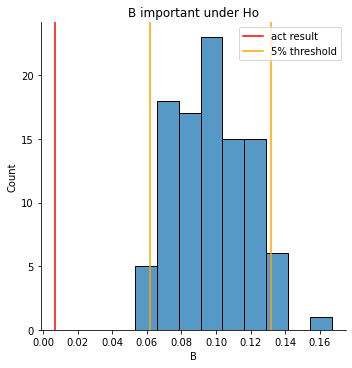

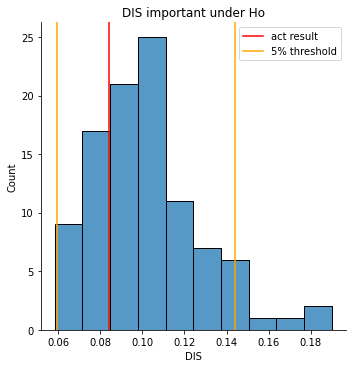

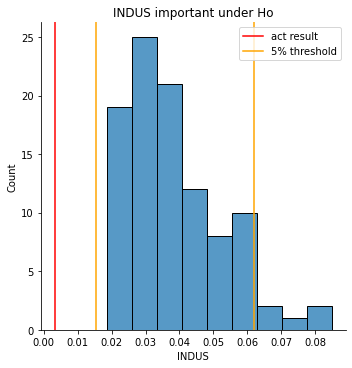

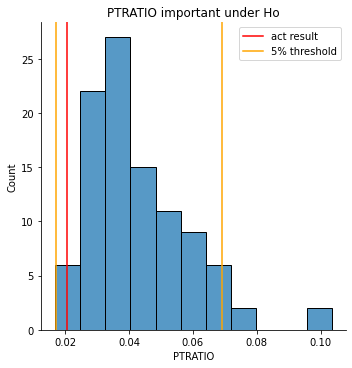

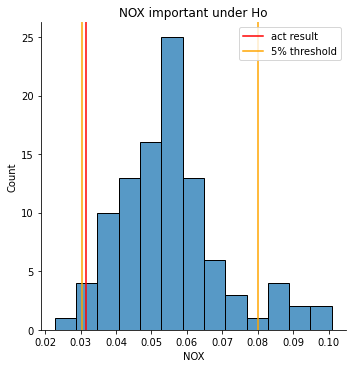

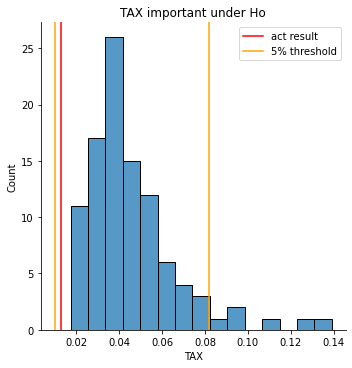

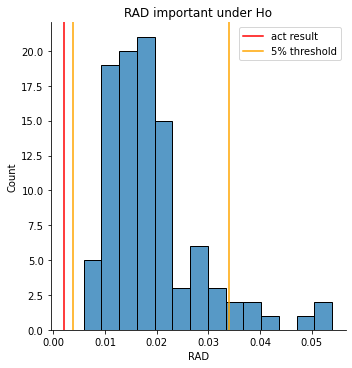

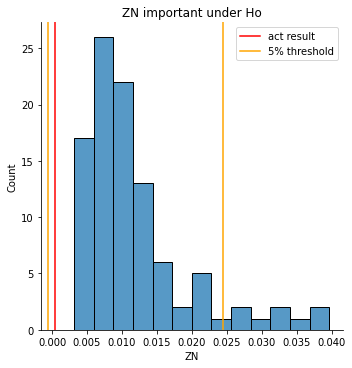

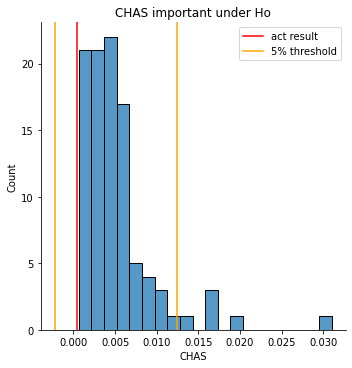

In [91]:
# without log trans, some other features will not be significant(CHAS)
plot_all_features(null_df,df,False)

---
# TEST ON SAheart DATA
## regression model predict `sbp`

In [3]:
df = pd.read_csv('SAheart.csv')
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [4]:
df.drop('row.names',axis=1,inplace=True)
X, y = df.iloc[:,1:],df['sbp']

In [5]:
X = pd.get_dummies(X)
#X_scale= pd.DataFrame(StandardScaler().fit_transform(X),columns=list(X))

In [6]:
features, xs,ys = auto_feat_select(X,y)
features, xs,ys 

(['age', 'adiposity', 'alcohol', 'typea', 'ldl'],
 [11, 6, 5, 4],
 [53.24701753246753, 53.836943722943715, 51.56674848484848, 53.36458398268398])

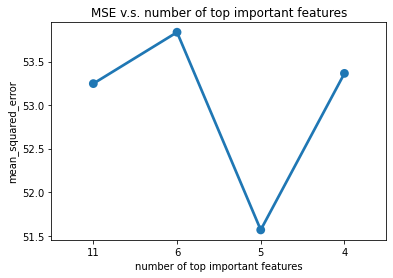

In [7]:
sns.pointplot(x = [str(i) for i in xs],y = ys)
plt.xlabel('number of top important features')
plt.ylabel('mean_squared_error')
plt.title('MSE v.s. number of top important features');

In [8]:
noise = pd.Series(np.random.normal(0, 1, X.shape[0]), name='noise')
X_noise = X.join(noise)
X_noise_scal = pd.DataFrame(StandardScaler().fit_transform(X_noise),columns=list(X_noise))
X_noise_scal

,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present,noise
0,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.373863,-1.185854,1.185854,-0.636671
1,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1.373863,0.843274,-0.843274,-0.096295
2,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,-0.727875,-1.185854,1.185854,-1.305285
3,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.373863,-1.185854,1.185854,-0.408886
4,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.373863,-1.185854,1.185854,0.274206
...,...,...,...,...,...,...,...,...,...,...,...
457,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,-0.727875,0.843274,-0.843274,0.100206
458,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1.373863,0.843274,-0.843274,-1.472126
459,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,-0.727875,0.843274,-0.843274,1.155187
460,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,-0.727875,0.843274,-0.843274,0.533255


## check feat imp

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


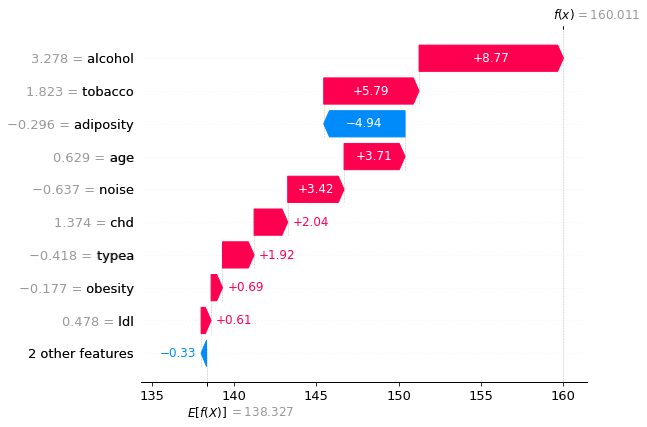

In [9]:
model = xgboost.XGBRegressor().fit(X_noise_scal, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_noise_scal)

# # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

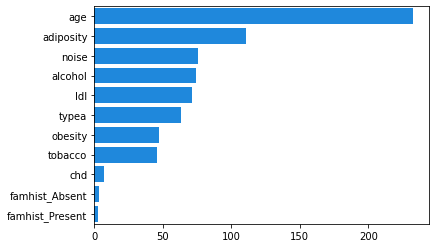

In [10]:
rf = RandomForestRegressor(oob_score=True)
permut_result = abs(permutation_importances(rf,X_noise_scal,y)).sort_values(ascending=False)
visualizing(permut_result)

## Feature important with 95% CI

In [11]:
# def empirical_imp(X, y, handle = RandomForestRegressor, n_run=80, shuffle_y=False):
#     '''
#     shuffle_y = False - Returns actual permuted Feature important with 95% CI
#     shuffle_y = True - Returns Feature importance under Ho: feature is not significant in predicting y
#     '''
#     imp_df = pd.DataFrame()
#     for i in tqdm(range(n_run)):
#         rf = handle(oob_score=True)
#         if shuffle_y:
#             permute_imp = permutation_importances(
#                 rf, X, np.random.permutation(y))

#             #y = np.random.permutation(y)
#         else:
#             permute_imp = permutation_importances(rf, X, y)
#         # normalize
#         normalized_imp = permute_imp/permute_imp.sum()
#         # form to 1*k df
#         norm_df = pd.DataFrame(normalized_imp).T
#         # Concat the latest importances with the old ones
#         imp_df = pd.concat([imp_df, norm_df], axis=0)
#     imp_df.reset_index(drop=True, inplace=True)
#     return imp_df

100%|████████████████████████████| 80/80 [00:23<00:00,  3.44it/s]


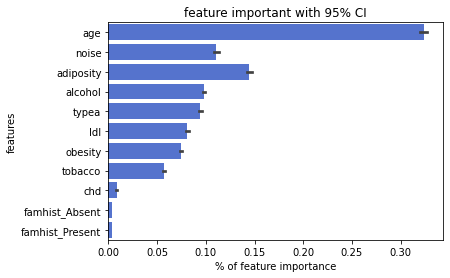

In [12]:
emp_df = empirical_imp(X_noise_scal,y)
sns.barplot(data=emp_df,orient='h',color='royalblue')
plt.xlabel('% of feature importance')
plt.ylabel('features')
plt.title('feature important with 95% CI');

> shap result is different than permut result, permut makes more sense
### hypothesis test

In [13]:
null_df = empirical_imp(X_noise_scal,y, shuffle_y=True,n_run=100)

100%|██████████████████████████| 100/100 [00:31<00:00,  3.21it/s]


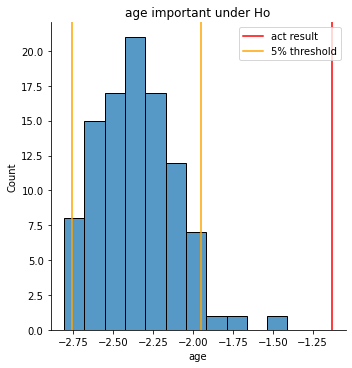

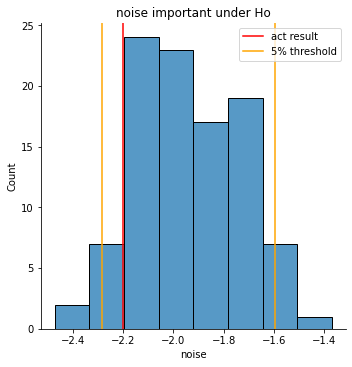

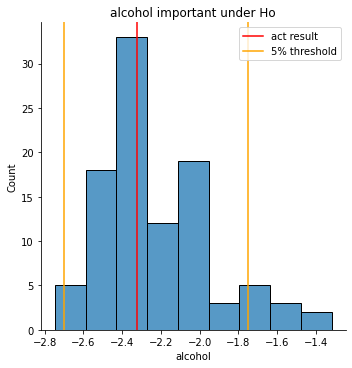

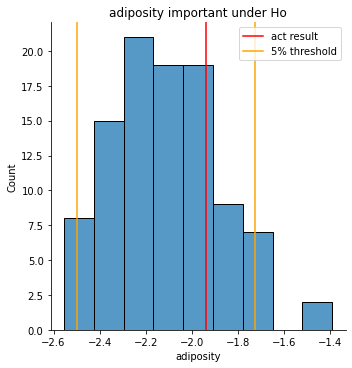

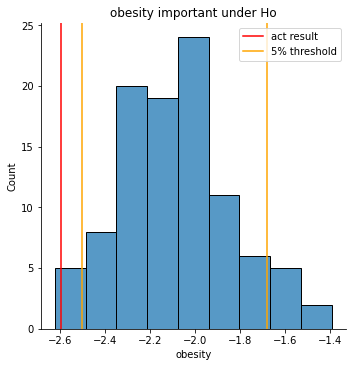

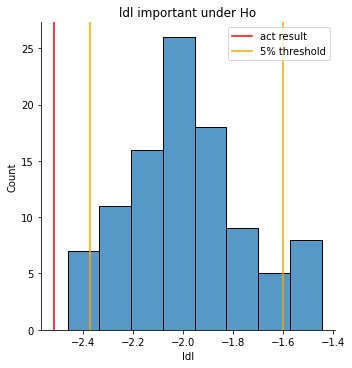

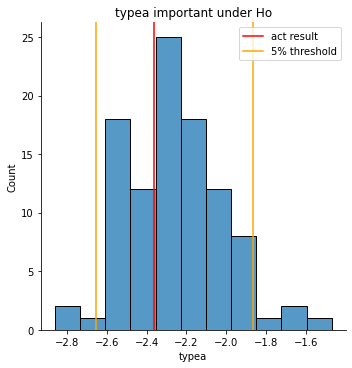

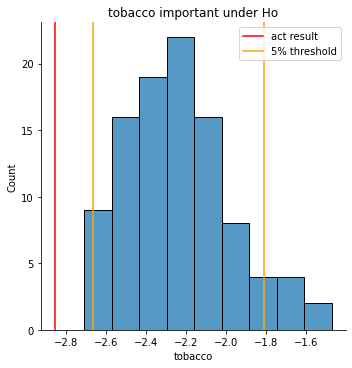

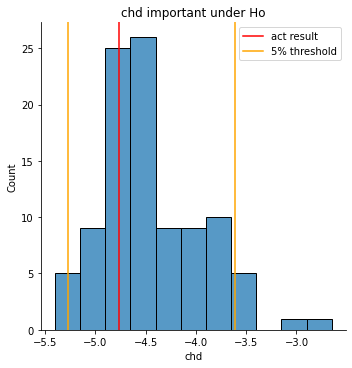

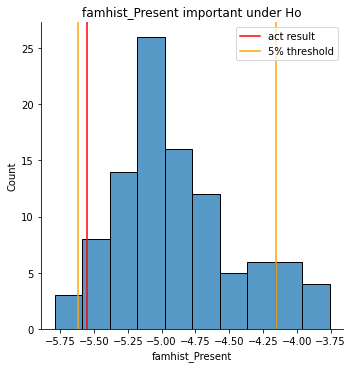

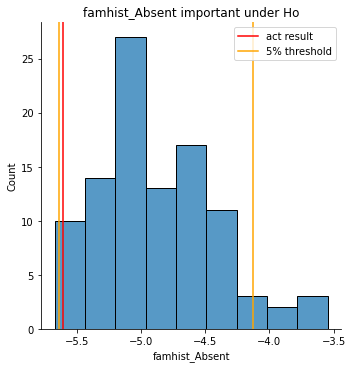

In [14]:
# apply log trans
plot_all_features(null_df,emp_df)

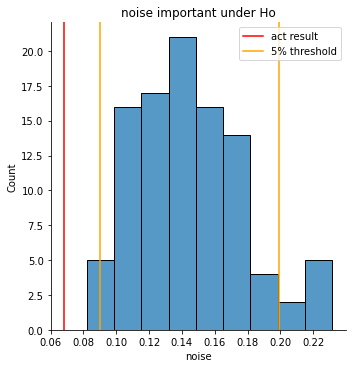

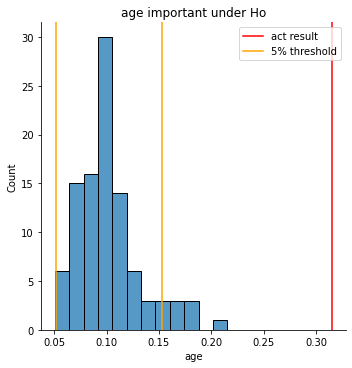

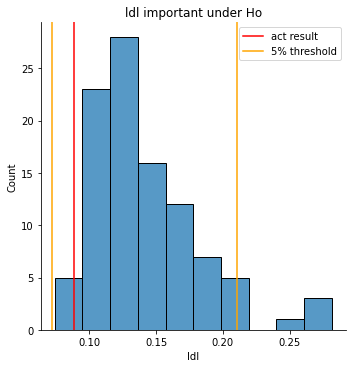

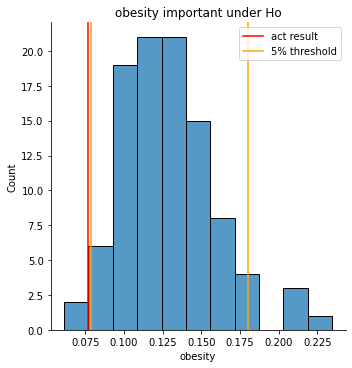

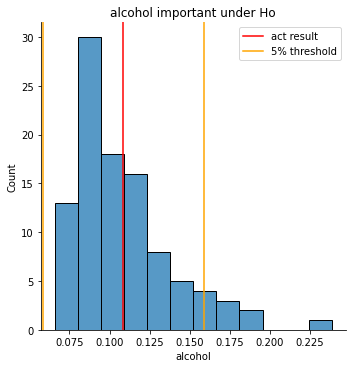

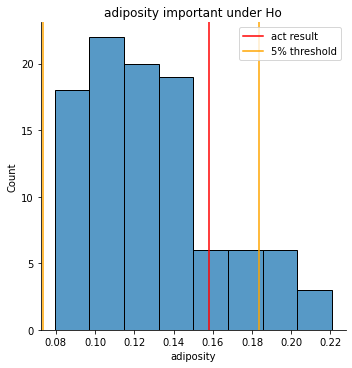

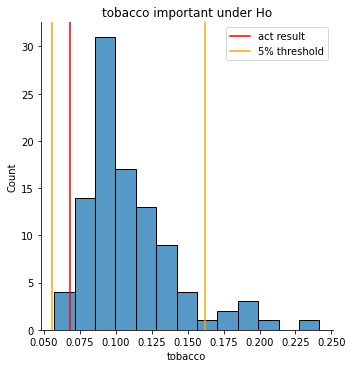

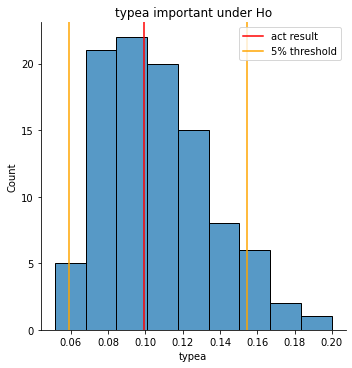

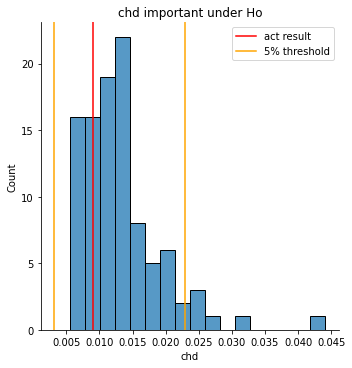

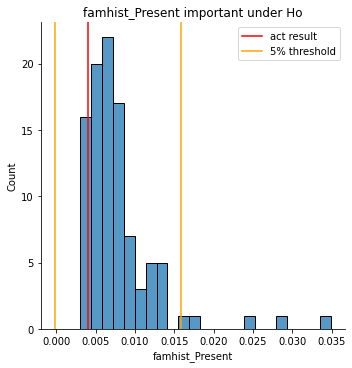

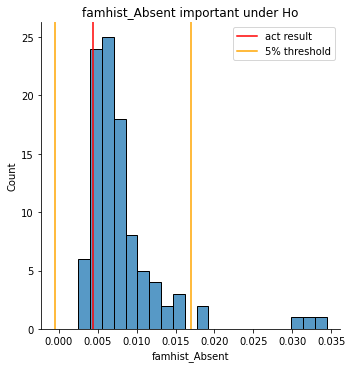

In [23]:
# without log trans, some other features will not be significant(CHAS)
plot_all_features(null_df,emp_df,False)

# feat imp with classifer
switch famhist to y

In [15]:
# check balance
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [16]:
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [17]:
X, y = df.drop('famhist',axis = 1),df['famhist']

In [18]:
# change to binary label
y = y.map(lambda x: 1 if x == 'Present' else 0)

In [222]:
# noise = pd.Series(np.random.normal(0, 1, X.shape[0]), name='noise')
# X_noise = X.join(noise)
# X_noise_scal = pd.DataFrame(StandardScaler().fit_transform(X_noise),columns=list(X_noise))
# X_noise_scal

In [19]:
# def permutation_importances(rf, X_train, y_train):
#     '''
#     rf = RandomForestRegressor(oob_score=True)
#     '''
#     rf.fit(X_train, y_train)
    
#     if is_regressor(rf):
#         y_pred = rf.predict(X_train)
#         metric = mean_squared_error

#     elif is_classifier(rf):
#         y_pred = rf.predict_proba(X_train)
#         metric = log_loss

#     #y_pred = rf.predict(X_train)
#     baseline = metric(y_train, y_pred)
#     imp = []
#     for col in X_train.columns:
#         save = X_train[col].copy()
#         X_train[col] = np.random.permutation(X_train[col])
        
        
#         if is_regressor(rf):
#             y_pred = rf.predict(X_train)
#         elif is_classifier(rf):
#             y_pred = rf.predict_proba(X_train)
        
#         #y_pred = rf.predict(X_train)
#         m = metric(y_train, y_pred)

#         X_train[col] = save
#         imp.append(baseline - m)
#     # can't distinguish positive/negative change
#     sorted_featimp = abs(pd.Series(np.array(imp), list(X_train)))
#     return sorted_featimp.sort_values(ascending=False)

In [20]:
# rf = RandomForestClassifier()
# class_imp = permutation_importances(rf, X_noise_scal, y, RandomForestClassifier, log_loss)
# visualizing(class_imp)

In [21]:
# def auto_feat_select(X, y, handle = RandomForestRegressor):
#     plotx = []
#     ploty = []
#     # add noise column
#     noise = pd.Series(np.random.normal(0, 1, X.shape[0]), name='noise')
#     X_noise = X.join(noise)
    
#     X_noise_scal = pd.DataFrame(StandardScaler().fit_transform(X_noise),columns=list(X_noise))
    
#     plotx.append(X_noise_scal.shape[1])
#     # baseline loss
#     rf = handle(oob_score=True)
#     rf_ = clone(rf)
#     rf_.fit(X_noise_scal, y)
    
#     if handle== RandomForestRegressor:
#         y_pred = rf_.predict(X_noise_scal)
#         metric = mean_squared_error
#     elif handle== RandomForestClassifier:
#         y_pred = rf_.predict_proba(X_noise_scal)
#         metric = log_loss
            
#     all_feature_metric = metric(y, y_pred)
#     ploty.append(all_feature_metric)
#     # get permut featimp
#     featimp = permutation_importances(rf, X_noise_scal, y)
#     # get feature names that above the noise column
#     imp_features = list(featimp[:list(featimp.index).index('noise')].index)
#     # drop all features below noise and noise
#     X_reduce = X_noise_scal.loc[:, imp_features]
#     plotx.append(X_reduce.shape[1])
#     # recompute loss
#     rf_new = handle(oob_score=True)
#     rf_new.fit(X_reduce, y)
    
#     if handle== RandomForestRegressor:
#         y_pred_new = rf_new.predict(X_reduce)
#     elif handle== RandomForestClassifier:
#         y_pred_new = rf_new.predict_proba(X_reduce)
        
#     #y_pred_new = rf_new.predict(X_reduce)
#     baseline = metric(y, y_pred_new)
#     ploty.append(baseline)
#     # drop one feature at a time from the least imp one

#     # print(f'after drop noise and below: {imp_features}')
#     # print(f'init baseline : {baseline}')
    
#     for i in range(1, len(imp_features)):
#         # print(f'features: {imp_features}')
#         X_reduce = X_reduce.loc[:, imp_features[:-1]]
#         plotx.append(X_reduce.shape[1])
#         # print(f'try: {list(X_reduce)}')
#         # recompute loss
#         rf_new = handle(oob_score=True)
#         rf_new.fit(X_reduce, y)
        
#         if handle== RandomForestRegressor:
#             y_pred_new = rf_new.predict(X_reduce)
#         elif handle== RandomForestClassifier:
#             y_pred_new = rf_new.predict_proba(X_reduce)
        
#         #y_pred_new = rf_new.predict(X_reduce)
#         new_metirc = metric(y, y_pred_new)
#         ploty.append(new_metirc)
#         # print(f'baseline: {baseline}, new_metirc: {new_metirc}')

#         if new_metirc > baseline:
#             return imp_features, plotx, ploty
#         imp_features = list(X_reduce)
#         baseline = new_metirc.copy()

['age', 'chd', 'ldl', 'adiposity', 'tobacco']


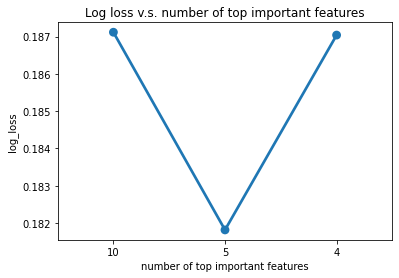

In [22]:
features, xs,ys = auto_feat_select(X,y, RandomForestClassifier)
print(features)
sns.pointplot(x = [str(i) for i in xs],y = ys)
plt.xlabel('number of top important features')
plt.ylabel('log_loss')
plt.title('Log loss v.s. number of top important features');

In [23]:
# check featimp
noise = pd.Series(np.random.normal(0, 1, X.shape[0]), name='noise')
X_noise = X.join(noise)
X_noise_scal = pd.DataFrame(StandardScaler().fit_transform(X_noise),columns=list(X_noise))
X_noise_scal

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,noise
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.373863,-0.676441
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1.373863,-0.580192
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,-0.727875,-1.758898
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.373863,-0.279050
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.373863,-0.897938
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,-0.727875,0.094966
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1.373863,0.775487
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,-0.727875,0.828856
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,-0.727875,-1.088525


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


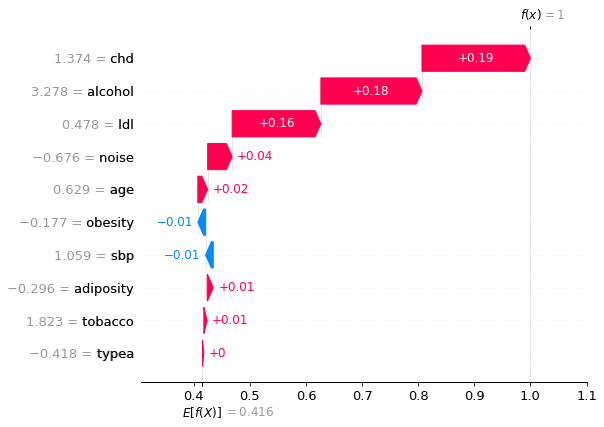

In [24]:
model = xgboost.XGBRegressor().fit(X_noise_scal, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_noise_scal)

# # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

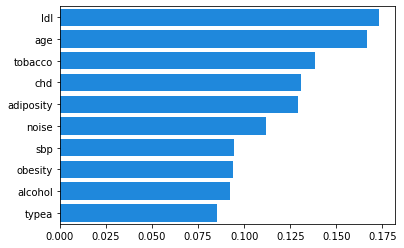

In [25]:
rf = RandomForestClassifier(oob_score=True)
permut_result = abs(permutation_importances(rf,X_noise_scal,y)).sort_values(ascending=False)
visualizing(permut_result)

100%|████████████████████████████| 80/80 [00:19<00:00,  4.19it/s]


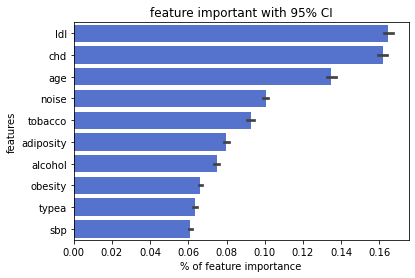

In [26]:
emp_df = empirical_imp(X_noise_scal,y)
sns.barplot(data=emp_df,orient='h',color='royalblue')
plt.xlabel('% of feature importance')
plt.ylabel('features')
plt.title('feature important with 95% CI');

In [27]:
null_df = empirical_imp(X_noise_scal,y, shuffle_y=True,n_run=100)

100%|██████████████████████████| 100/100 [00:24<00:00,  4.02it/s]


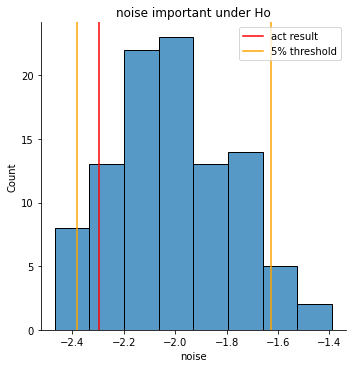

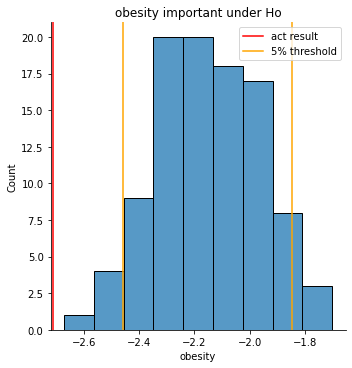

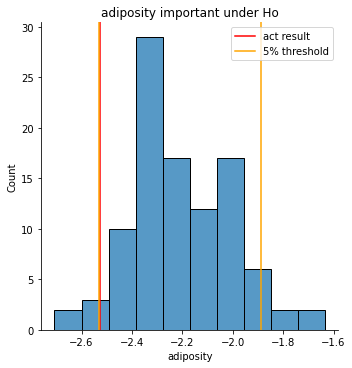

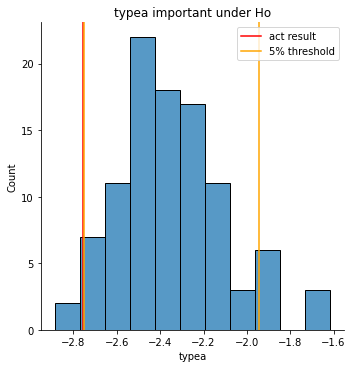

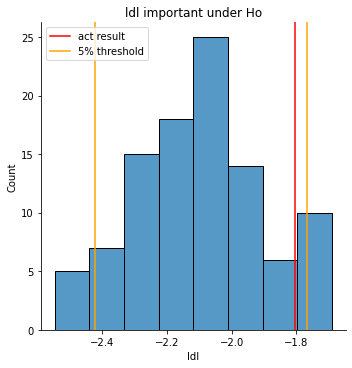

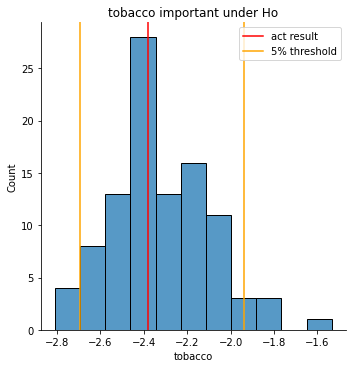

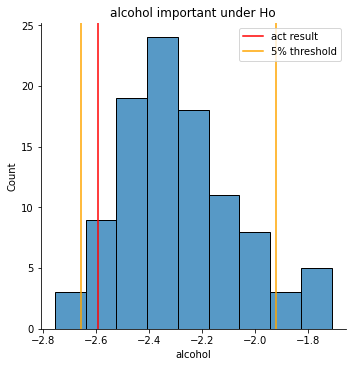

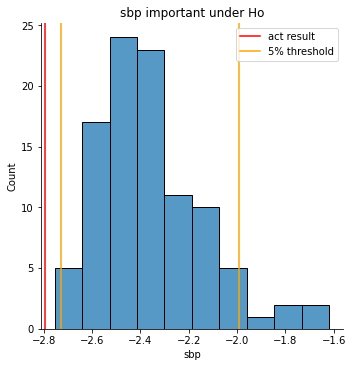

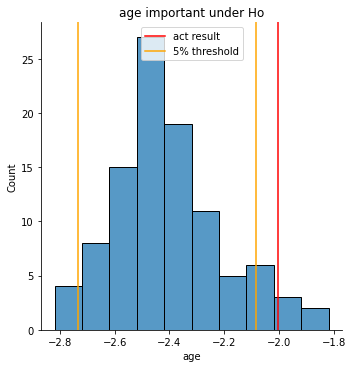

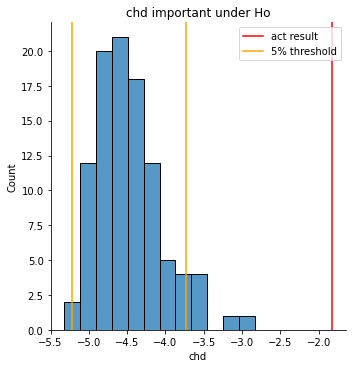

In [28]:
# apply log trans
plot_all_features(null_df,emp_df)

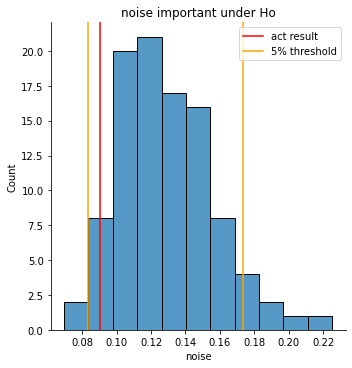

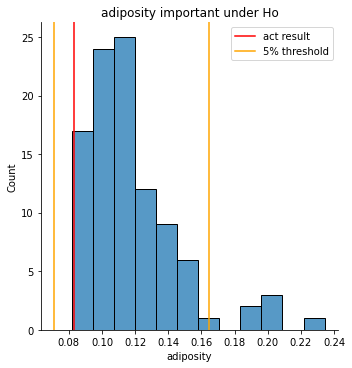

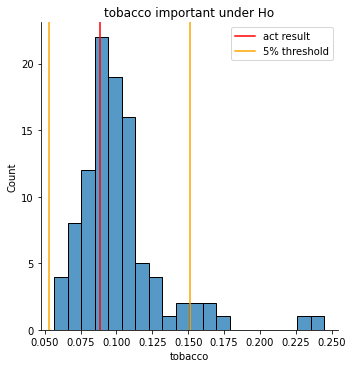

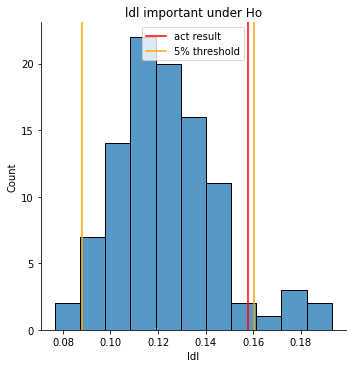

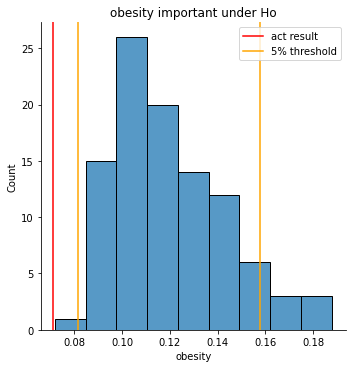

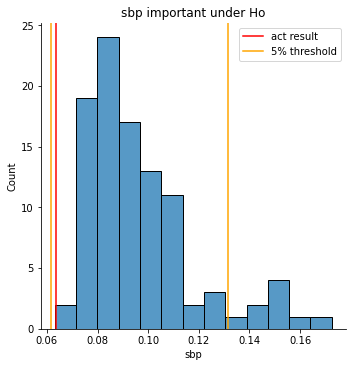

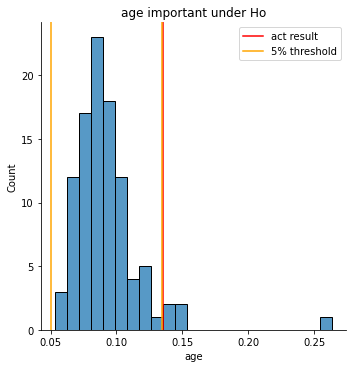

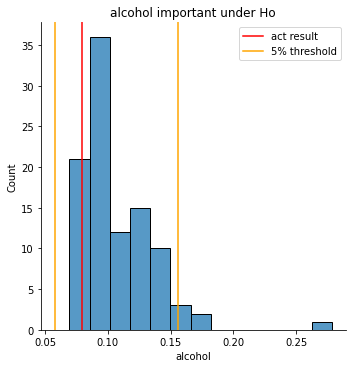

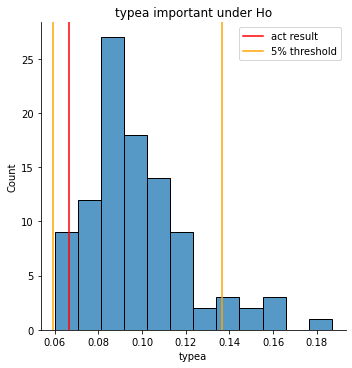

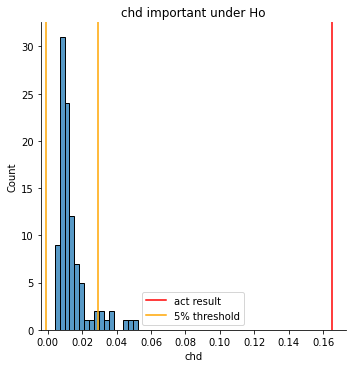

In [44]:
# without log trans, some other features will not be significant(CHAS)
plot_all_features(null_df,emp_df,False)